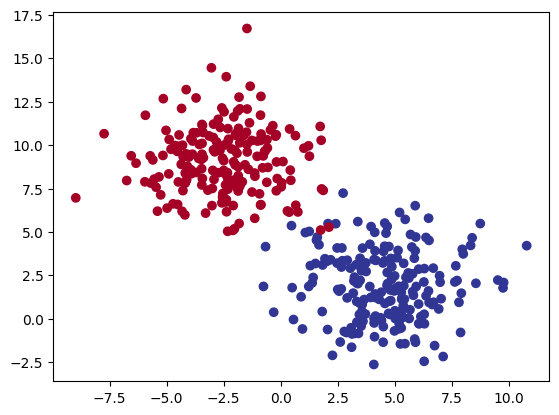

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=42)

plt.scatter(X.transpose()[0],
            X.transpose()[1],
            c=y,
            cmap="RdYlBu")
plt.show()

In [ ]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 400
Length of y: 400


In [ ]:
train_size = int(len(X) * 0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")

Length of X_train: 320
Length of X_test: 80


We have the get the partial derivative of the Log-Likelihood Function in terms of both the weight and bias.

The log-likelihood function for Logistic Regression being:
$$LogL(x;w,b) = \sum_{i=1}^N y_i \cdot ln(\sigma(wx_i + b)) + (1- y _i) \cdot ln((1 - \sigma(wx_i + b)))$$

Where:
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

The partial derivative of this function in terms of the weight is:
$$\frac{\partial Ll}{\partial w}=x_i(y_i-\sigma(wx_i))$$

We can use this to update the weight per epoch by subtracting the partial derivative times a learning rate of $\alpha$ from the previous weight.

Find the weight per epoch: $w_i=w_{i-1}-(\alpha \cdot \frac{\partial Ll}{\partial  w_i})$

The partial derivative of this function in terms of the bias is:
$$\frac{\partial Ll}{\partial b}=(y_i-\sigma(wx_i))$$

We can use this to update the bias per epoch by subtracting the partial derivative times a learning rate of $\alpha$ from the previous bias.

Find the bias per epoch: $b_i=b_{i-1}-(\alpha \cdot \frac{\partial Ll}{\partial  b_i})$




In [ ]:
class LogisticRegression():
  """
  This is a custom Logistic Regression Model that uses the partial derivatives of the Log-likelihood function
  in terms of the weights and bias to predict probabilities using the sigmoid function.
  """
  def __init__(self,
               input_size: int = None):
    if input_size == None:
      raise ValueError("Provide an input_size")

    self.w = np.ones((input_size, 1)) # We have the make an array of 1s for the weights cause there are more than one feature
    self.b = 1

  def sigmoid(self, x):
    return (1 / (1 + np.exp(-x)))

  def predict_proba(self, X):
    return self.sigmoid(X @ self.w + self.b)

  def predict(self, X):
    # Boolean -> 1, 0
    return (self.predict_proba(X) >= 0.5).astype(int)

  def log_likelihood(self, X, y):
    y_prob = self.predict_proba(X)
    return sum(y * np.ln(y_prob) + (1 - y) * np.ln(1 - y_prob))

  def fit(self, X, y):
    epochs = 100

    for epoch in range(epochs):
      y_prob = self.predict_proba(X)

      # Get the partial derivative of the weight

      # Note: We have to reshape y to get in the proper form to be subtracted from y_prob
      D_w = X.T @ (y_prob - y.reshape(-1, 1))

      # Get the partial derivative of the bias
      D_b = np.mean(y_prob - y.reshape(-1, 1))

      lr = 0.0002

      self.w -= (lr * D_w)
      self.b -= (lr * D_b)

      # Print the accuracy
      if epoch % (epochs / 10) == 0:
        y_pred = self.predict(X)
        acc = np.mean(y_pred == y.reshape(-1, 1))
        print(f"Epoch: {epoch} | Training Accuracy: {acc:.6f}")

    print(f"Weights: {self.w} | Bias: {self.b}")

In [ ]:
model = LogisticRegression(input_size=2)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

test_acc = np.mean(y_preds == y_test.reshape(-1, 1))

print(f"Test Accuracy: {test_acc:.6f}")

Epoch: 0 | Training Accuracy: 0.506250
Epoch: 10 | Training Accuracy: 0.975000
Epoch: 20 | Training Accuracy: 0.987500
Epoch: 30 | Training Accuracy: 0.987500
Epoch: 40 | Training Accuracy: 0.987500
Epoch: 50 | Training Accuracy: 0.990625
Epoch: 60 | Training Accuracy: 0.990625
Epoch: 70 | Training Accuracy: 0.990625
Epoch: 80 | Training Accuracy: 0.990625
Epoch: 90 | Training Accuracy: 0.990625
Weights: [[ 1.32216555]
 [-0.47778332]] | Bias: 0.999696575615288
Test Accuracy: 0.975000


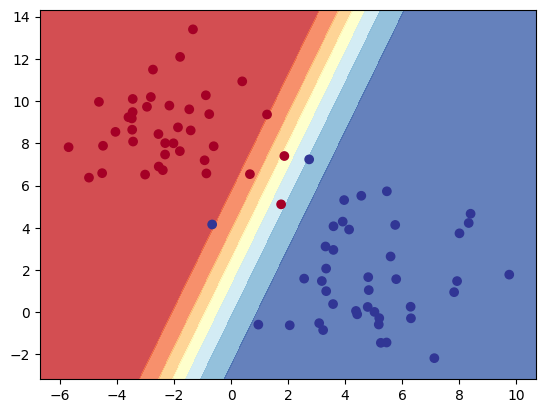

In [ ]:
# Get the weight and bias values
w = model.w
b = model.b

# Create a meshgrid of points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

predicted_probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
predicted_probs = predicted_probs.reshape(xx.shape)

plt.contourf(xx, yy, predicted_probs, alpha=0.8, cmap="RdYlBu")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="RdYlBu")
plt.show()